In [2]:
#构造一个三层的  然后使用前向传播实战  张量 直接做  使用传统的矩阵 方式
# 后面会介绍曾方式
# deep-learning 理解

# forword.py
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

#  x [60k,28,28]
#  y [60k]
(x , y), _ = datasets.mnist.load_data()

# x [0 - 255] - [0 - 1]
x = tf.convert_to_tensor(x,dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y,dtype = tf.int32)

print(x.shape,y.shape,x.dtype,y.dtype)
print(tf.reduce_min(x),tf.reduce_max(x),tf.reduce_min(y),tf.reduce_max(y))

(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(255.0, shape=(), dtype=float32) tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)


In [3]:
#每次取128个张
train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)
train_iter = iter(train_db)
sample = next(train_iter)
print('batch',sample[0].shape,sample[1].shape)

batch (128, 28, 28) (128,)


In [29]:
# [b,784] => [b,521,] => [b,128] => [b,10]
# w [dom_in,dim_out]    b [wim_out]
w1 = tf.Variable(tf.random.truncated_normal([784,256],stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256,128],stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128,10],stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))
# w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
# b1 = tf.Variable(tf.zeros([256]))
# # 第二层的参数
# w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
# b2 = tf.Variable(tf.zeros([128]))
# # 第三层的参数
# w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
# b3 = tf.Variable(tf.zeros([10]))
lr = 1e-3
for epoch in range(10): #对整个数据集迭代10次
    for step, (x, y) in enumerate(train_db): # for every batch
        # x [128,28,28]
        # y [128]
        # [b,28,28] => [b,28*28]
        x = tf.reshape(x,[-1,28*28])

        with tf.GradientTape() as type:  #只会跟踪 tf.Varialbe
            # x [b,28*28]
            # h1 = x@w1 + b1
            # [b,784]@[784,256] + [256] => [b,256] + [256]
            h1 =  x@w1 + tf.broadcast_to(b1,[x.shape[0],256])
            h1 = tf.nn.relu(h1)
            #[b,256] => [b,128]
            h2 =  h1 @ w2 +b2
            h2 = tf.nn.relu(h2)
            out = h2 @ w3 + b3

            #computer loss
            # out shape[b,10]
            #     y [b]
            y_onehot = tf.one_hot(y,depth = 10)

            # mse = mean((y - out)^2)
            loss = tf.square(y_onehot - out)
            #loss = tf.square(y - out)
            #mean : scalar
            loss =tf.reduce_mean(loss)
        #computr gradients
            grads = type.gradient(loss,[w1,b1,w2,b2,w3,b3])
        # w1 = w1 -lr * w1_grade
        #w1.assign_sub(lr * grade[0])  #数据的类型保持不变 原地更新  都是Variable
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])

    #     w1 = w1 -lr * grade[0]
    #     b1 = b1 -lr * grade[1]
    #     w2 = w2 -lr * grade[2]
    #     b2 = b2 -lr * grade[3]
    #     w3 = w3 -lr * grade[4]
    #     b3 = b3 -lr * grade[5]

        if step % 100 ==0:
            print(epoch,step,'loss:',float(loss))

0 0 loss: 23747.296875
0 100 loss: nan
0 200 loss: nan
0 300 loss: nan
0 400 loss: nan
1 0 loss: nan
1 100 loss: nan
1 200 loss: nan
1 300 loss: nan
1 400 loss: nan
2 0 loss: nan
2 100 loss: nan
2 200 loss: nan
2 300 loss: nan
2 400 loss: nan
3 0 loss: nan
3 100 loss: nan
3 200 loss: nan
3 300 loss: nan
3 400 loss: nan
4 0 loss: nan
4 100 loss: nan
4 200 loss: nan
4 300 loss: nan
4 400 loss: nan
5 0 loss: nan
5 100 loss: nan
5 200 loss: nan
5 300 loss: nan
5 400 loss: nan
6 0 loss: nan
6 100 loss: nan
6 200 loss: nan
6 300 loss: nan
6 400 loss: nan
7 0 loss: nan
7 100 loss: nan
7 200 loss: nan
7 300 loss: nan
7 400 loss: nan
8 0 loss: nan
8 100 loss: nan
8 200 loss: nan
8 300 loss: nan
8 400 loss: nan
9 0 loss: nan
9 100 loss: nan
9 200 loss: nan
9 300 loss: nan
9 400 loss: nan


0 0 loss: 0.40986085
0 100 loss: 0.21924451
0 200 loss: 0.17095098
1 0 loss: 0.16643244
1 100 loss: 0.1639199
1 200 loss: 0.14830378
2 0 loss: 0.14851353
2 100 loss: 0.14971627
2 200 loss: 0.13586676
3 0 loss: 0.13616422
3 100 loss: 0.13925797
3 200 loss: 0.12641372
4 0 loss: 0.12668924
4 100 loss: 0.13103408
4 200 loss: 0.11895633
5 0 loss: 0.1191565
5 100 loss: 0.124378376
5 200 loss: 0.11291341
6 0 loss: 0.11296575
6 100 loss: 0.118852496
6 200 loss: 0.107912645
7 0 loss: 0.10778787
7 100 loss: 0.11420251
7 200 loss: 0.103679925
8 0 loss: 0.10338034
8 100 loss: 0.110215224
8 200 loss: 0.10004336
9 0 loss: 0.09956934
9 100 loss: 0.10673466
9 200 loss: 0.09687663
10 0 loss: 0.09625656
10 100 loss: 0.10366602
10 200 loss: 0.09409881
11 0 loss: 0.093343414
11 100 loss: 0.10093124
11 200 loss: 0.091621526
12 0 loss: 0.09076096
12 100 loss: 0.09846982
12 200 loss: 0.08940228
13 0 loss: 0.088450074
13 100 loss: 0.09623534
13 200 loss: 0.08738344
14 0 loss: 0.0863623
14 100 loss: 0.09419952

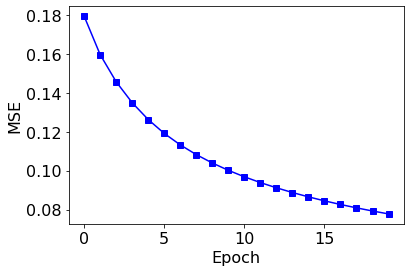

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as datasets
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False


def load_data():
    # 加载 MNIST 数据集
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)

    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))

    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset


def init_paramaters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3


def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b,256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)  # 通过激活函数

            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # 计算网络输出与标签之间的均方差， mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)

            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])

        if step % 100 == 0:
            print(epoch, step, 'loss:', loss.numpy())

    return loss.numpy()


def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        losses.append(loss)

    x = [i for i in range(0, epochs)]
    # 绘制曲线
    plt.plot(x, losses, color='blue', marker='s', label='训练')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')


if __name__ == '__main__':
    train(epochs=20)
